## Nguyễn Mạnh Khang
## 223030635

# KMeans

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

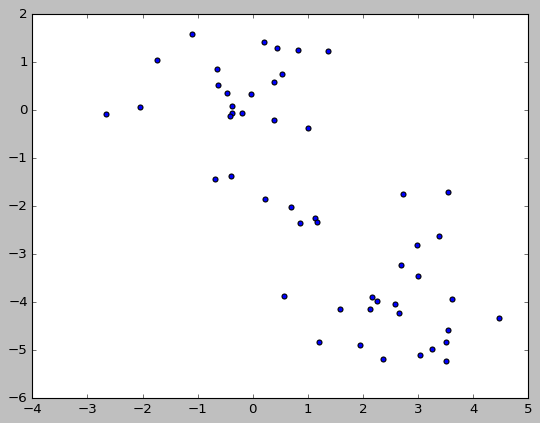

In [37]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [38]:
km = KMeans(n_clusters=2, n_init=20)
km.fit(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [39]:
m=km.cluster_centers_
print(m)

[[-0.23940153  0.14703307]
 [ 2.53287159 -3.80815122]]


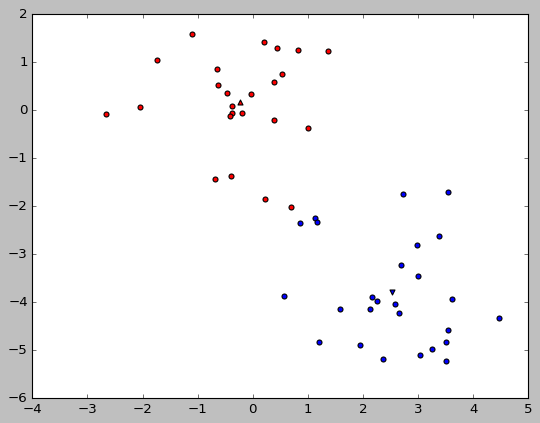

In [40]:
C1=km.labels_==0
C2=km.labels_==1
plt.scatter(X[C1,0],X[C1,1],c='red')
plt.scatter(X[C2,0],X[C2,1],c='blue')

plt.scatter(m[0][0],m[0,1],c='red', marker="^")
plt.scatter(m[1][0],m[1,1],c='blue', marker="v")
plt.show()

In [41]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X)
km3.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

In [42]:
m=km3.cluster_centers_
print(m)

[[ 2.82805911 -4.11351797]
 [-0.27876523  0.51224152]
 [ 0.69945422 -2.14934345]]


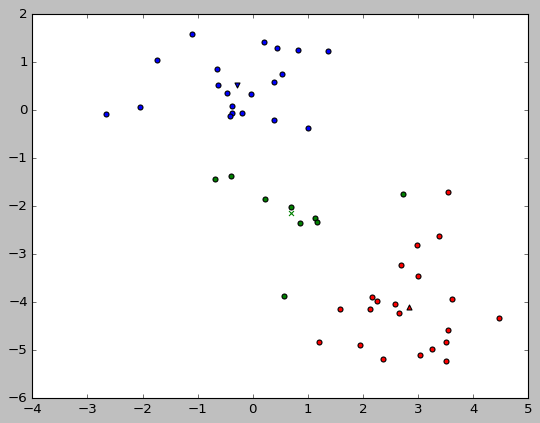

In [43]:
C1=km3.labels_==0
C2=km3.labels_==1
C3=km3.labels_==2
plt.scatter(X[C1,0],X[C1,1],c='red')
plt.scatter(X[C2,0],X[C2,1],c='blue')
plt.scatter(X[C3,0],X[C3,1],c='green')

plt.scatter(m[0][0],m[0,1],c='red', marker="^")
plt.scatter(m[1][0],m[1,1],c='blue', marker="v")
plt.scatter(m[2][0],m[2,1],c='green', marker="x")

plt.show()

# HierarchicalClustering

In [44]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [45]:
USArrests = pd.read_csv('./data/USArrests.csv', index_col=0)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)

In [46]:
X.shape

(50, 4)

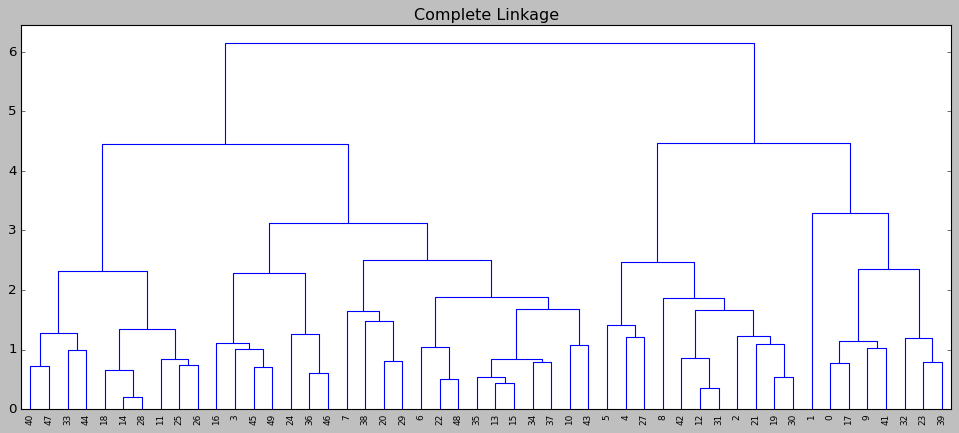

In [47]:
#hierarchy.complete
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.complete(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Complete Linkage')
plt.show()

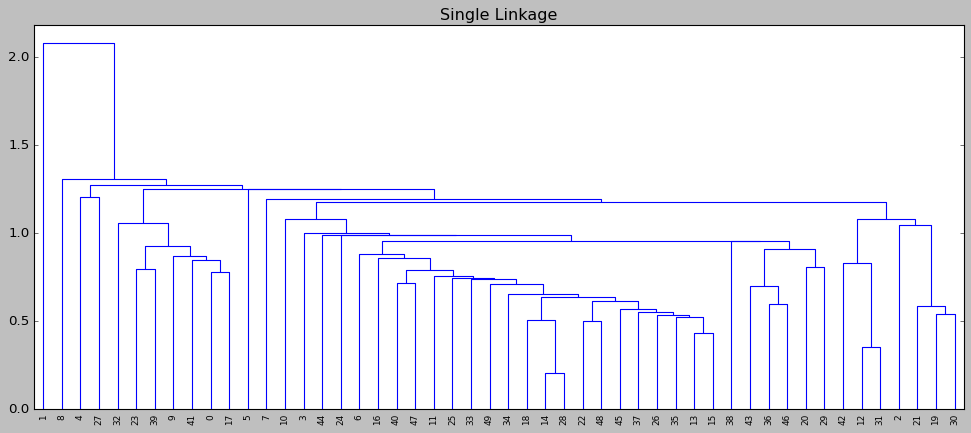

In [48]:
#hierarchy.single
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.single(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Single Linkage')
plt.show()

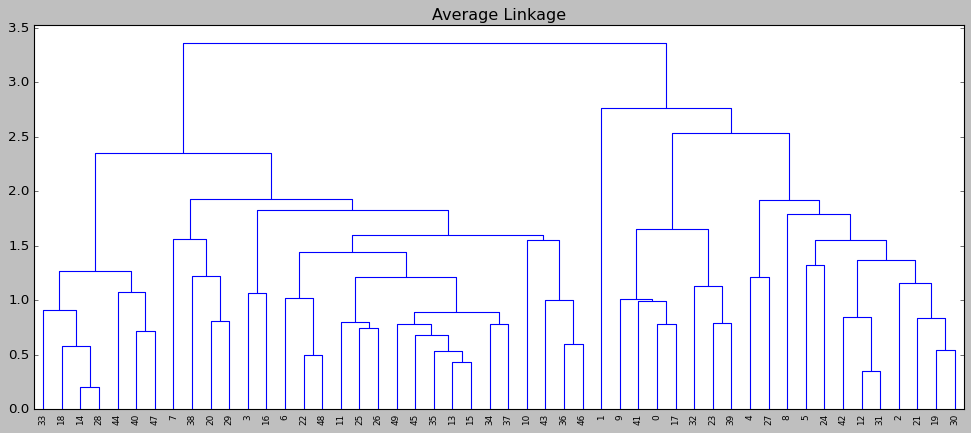

In [49]:
#hierarchy.average
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.average(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Average Linkage')
plt.show()

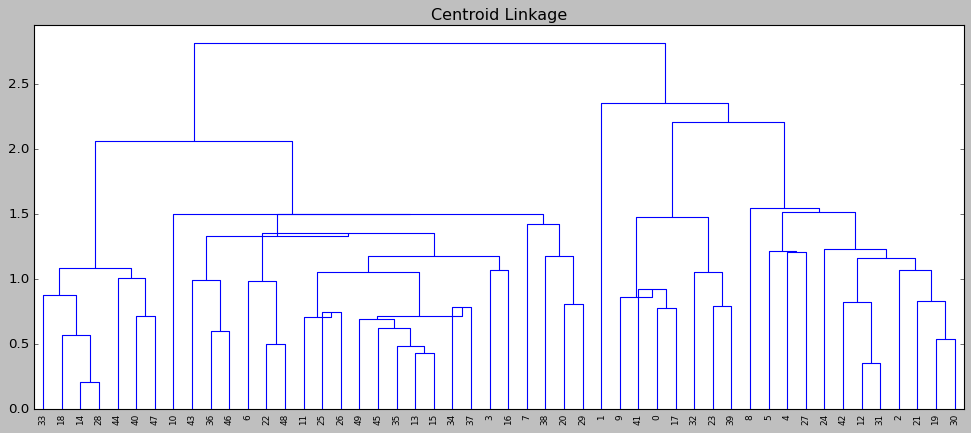

In [50]:
#hierarchy.centroid
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.centroid(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Centroid Linkage')
plt.show()

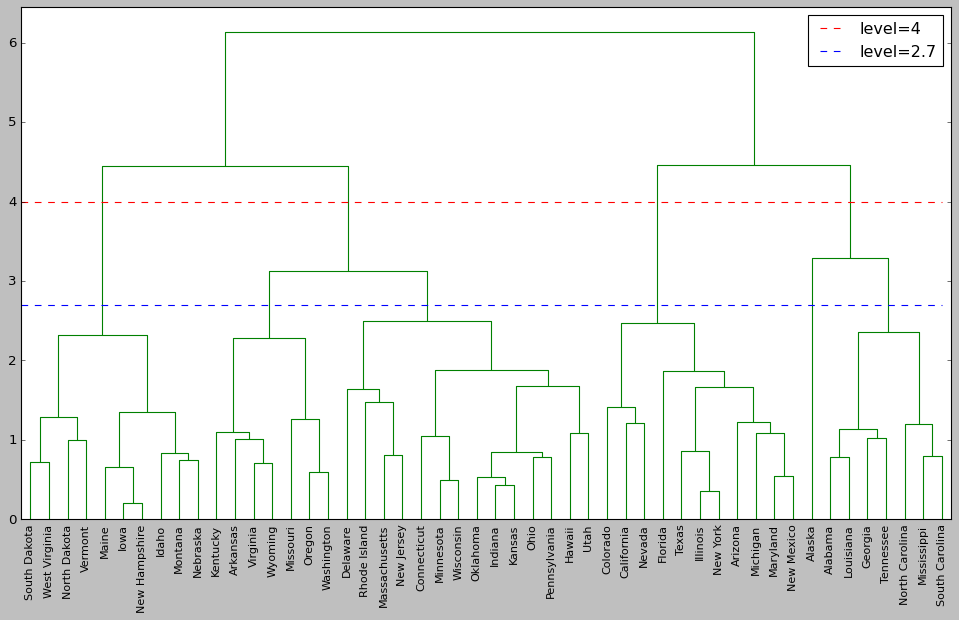

In [51]:
plt.figure(figsize=(15,8))
cut = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index,  
                            color_threshold=140, leaf_font_size=10)
plt.hlines(4.0,0,plt.gca().xaxis.get_data_interval()[1], 
           colors='r', linestyles='dashed',label='level=4')

plt.hlines(2.7,0,plt.gca().xaxis.get_data_interval()[1], 
           colors='blue', linestyles='dashed',label='level=2.7')
plt.legend()
plt.show()

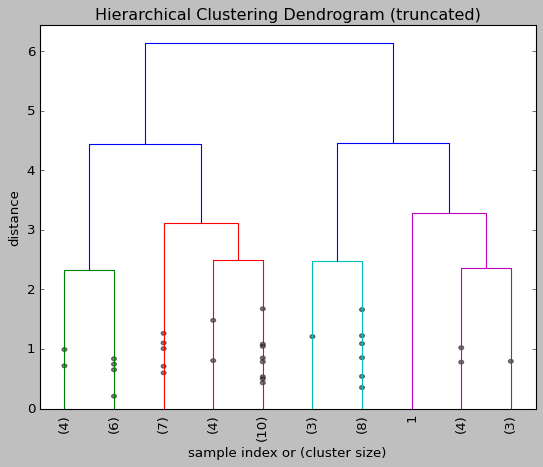

In [52]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    hierarchy.complete(X),
    truncate_mode='lastp', 
    p=10,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [53]:
Z=hierarchy.complete(X)
Z[:5]

array([[14.        , 28.        ,  0.2079438 ,  2.        ],
       [12.        , 31.        ,  0.35377437,  2.        ],
       [13.        , 15.        ,  0.43312429,  2.        ],
       [22.        , 48.        ,  0.49909939,  2.        ],
       [35.        , 52.        ,  0.53571007,  3.        ]])

In [54]:
print(Z[:,2].min(),Z[:,2].max())

0.2079437976133826 6.138334936847244


In [55]:
fcluster(Z,t=4,criterion='distance')

array([4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 1, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3,
       2, 4, 2, 1, 1, 3, 1, 2, 3, 3, 4, 1, 2, 2, 2, 2, 2, 4, 1, 4, 3, 2,
       1, 2, 2, 1, 2, 2], dtype=int32)

# PCA

In [56]:
from numpy.linalg import svd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
USArrests = pd.read_csv('./data/USArrests.csv', index_col=0)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)

In [58]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrests.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


In [59]:
# fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


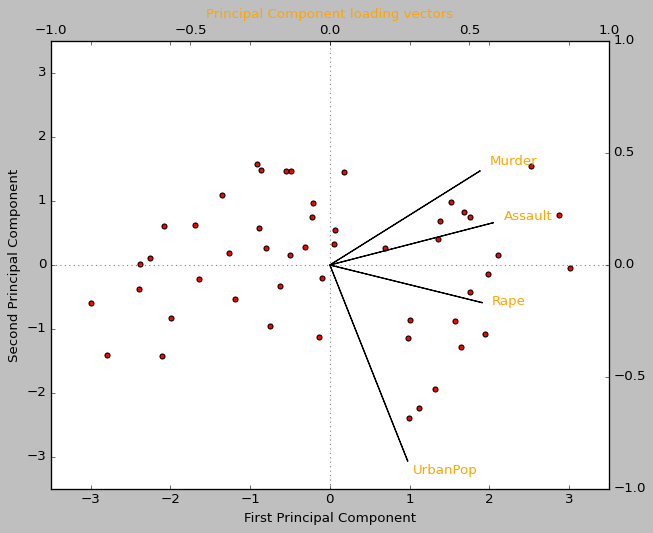

In [60]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)


df_plot.plot.scatter('PC1','PC2',c='red',ax=ax1)

# plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

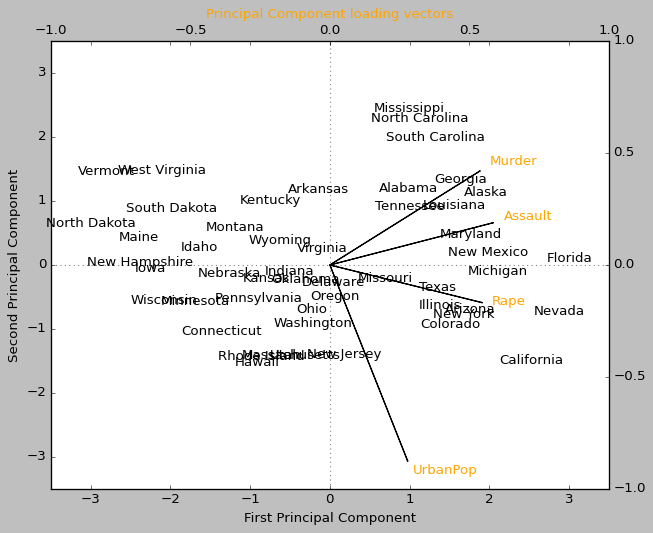

In [61]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

In [62]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]


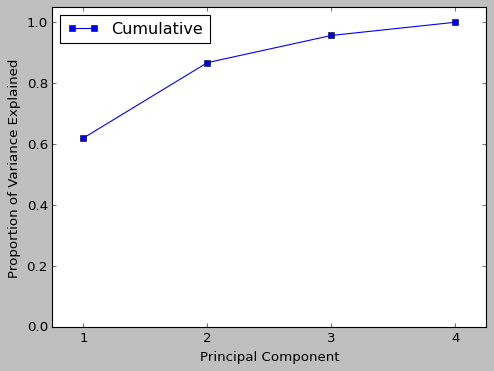

In [63]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show()

# MatrixCompletion

In [64]:
import pandas as pd
import numpy as np
from numpy.linalg import svd

In [65]:
n = 3
known_value_indices = tuple(zip(*[[0, 0], [0, 2], [1, 1], [2, 0], [2, 1]]))
known_values = [1.0, 1.9, 0.8, 3.2, 5.9]

In [66]:
X = np.empty((n, n))
X[:] = np.nan
X[known_value_indices]=known_values
X

array([[1. , nan, 1.9],
       [nan, 0.8, nan],
       [3.2, 5.9, nan]])

In [67]:
df = pd.DataFrame(X)
col_means = df.apply(np.mean, 0)
X_t=df.fillna(value=col_means).values
X_t

array([[1.  , 3.35, 1.9 ],
       [2.1 , 0.8 , 1.9 ],
       [3.2 , 5.9 , 1.9 ]])

In [68]:
# run sigular value decomposition on the data (SVD)
u, s, vh = svd(X_t, full_matrices=False)
u.shape, s.shape, vh.shape

((3, 3), (3,), (3, 3))

In [69]:
k = 2
recovered = np.dot(u[:, :k] * s[:k,], vh[:k,:])

In [70]:
recovered[known_value_indices]

array([1.5972546 , 1.2579891 , 0.79994274, 2.86665276, 5.92470515])

In [71]:
np.mean((known_values-recovered[known_value_indices])**2)


np.float64(0.17612435852304587)

In [72]:
def Matrix_Completion(X_t,Omega,values,k):
    u, s, vh = svd(X_t, full_matrices=False)
    X_r = np.dot(u[:, :k] * s[:k,], vh[:k,:])
    values_r=X_r[Omega]
    E=np.mean((values-values_r)**2)
    return X_r,E

In [73]:
X_r,E=Matrix_Completion(X_t,known_value_indices,known_values,k=2)
X_r[known_value_indices]=known_values
X_r

array([[1.        , 3.30573604, 1.9       ],
       [2.10077263, 0.8       , 1.89916947],
       [3.2       , 5.9       , 2.25832719]])

In [74]:
for i in range(100):
    X_r,E=Matrix_Completion(X_t,known_value_indices,known_values,k=2)
    X_r[known_value_indices]=known_values
    X_t=X_r

In [75]:
print(X_r)

[[1.         3.70566923 1.9       ]
 [2.45110718 0.8        1.30751011]
 [3.2        5.9        3.67056254]]


In [76]:
print(E)

6.532754371361504e-31


In [77]:
N = 2000
n = 100
r = 4
X=np.random.randn(n,n)
# Sample N=2000 random indices
Omega = np.random.choice(n*n, size=N, replace=False)
Omega = np.unravel_index(Omega, X.shape)
y = X[Omega]

In [78]:
df = pd.DataFrame(X)
col_means = df.apply(np.mean, 0)
X_t=df.fillna(value=col_means).values
X_t.shape

(100, 100)

In [79]:
X_r,E=Matrix_Completion(X_t,Omega,y,k=2)
X_r[Omega]=y
X_r.shape

(100, 100)

In [80]:
for i in range(100):
    X_r,E=Matrix_Completion(X_t,Omega,y,k=2)
    X_r[Omega]=y
    X_t=X_r

In [81]:
X_t

array([[ 2.31997493,  0.80199443, -0.93789042, ..., -0.62242436,
        -0.89426193, -1.32700029],
       [ 1.44838758, -1.06492788, -0.55689816, ..., -0.45202577,
        -0.41097103,  0.37162216],
       [ 0.2578616 , -0.4889559 ,  0.0285594 , ..., -0.36337174,
         0.58381587,  0.96188707],
       ...,
       [-0.36572269,  0.34879151,  0.06710113, ...,  0.0444666 ,
         0.06407377,  0.09509557],
       [ 1.94177157,  0.44663545,  0.16766469, ..., -0.63526314,
        -0.48301922, -0.67962563],
       [-1.35898381, -0.20934405,  1.43650381, ...,  0.64453774,
         0.81219623, -0.23980607]], shape=(100, 100))

In [84]:
print(E)

0.6246099615187449
